# Regressão Linear Simples e Múltipla

<p>

    Modelo de Regressão Linear Simples (MRLS)
        Equação da Regressão Linear Simples
            Y = β0 + β1.x1 + e
            β0 e β1 são parâmetros
    
        Estivativa de valor para y (ŷ)
            ŷ = β0 + β1.x1
    
        Método dos Mínimos Quadrados
            Obter a equação da reta que melhor descreve o fenomeno
            minimizar erros
            Soma dos erros igual a 0
            Cálculo dos parâmetros β0 e β1
            β1 = (xi - x_)(yi - y_) / (xi - x)²
            β0 = y_ - β1.x_
    
        Interpretação de parâmetros
            O coeficiente β1, na regressão linear simples, representa uma estimativa da alteração em ỹ correspondente á alteração de uma unidade em xi
            O coeficiente β0, na regressão linear simples, representa uma estimativa de ỹ quando xi é 0
    
        Avaliação do modelo
            R2 (Coeficiente de determinação):
                R2 = Σ(ŷ - y_)² / Σ(y - y_)²
                R2 = r² (coef. correlação ao quadrado no caso de regressão linear simples)
                O R2 representa a proporção da variabilidade da variável dependente que pode ser explicada pela equação estimada
                
            RMSE:
                RMSE é mais utilizado por ser mais conservador, exarceba erros
                RMSE estima o quanto está errando em valores de negócio
                RMSE = √Σ(y - ŷ)²/n
                Estima o quanto está errando em valores de negócio

            MAE: Erro médio absoluto similar ao RMSE

            MSE: Utilizado para comparação mas não para injterpretação

            MAPE: ainda não abordado, há problemas na utilização quando se apresenta valor 0
    
    
    Modelo de Regressão Linear Múltipla (MRLM)
        Equação da Regressão Linear Múltipla
            Y = β0 + β1.x1 + β2.x2 + ... + βp.xp + e
    
        Estimativa de valor para y (ŷ)
            ŷ = β0 + β1.x1 + β2.x2 + ... + βp.xp
    
        Interpretação de parâmetros
            O coeficiente bp na regressão múltipla representa uma estimativa da alteração em y correspondente á alteração de uma unidade em xi quando todas as outras variáveis independentes se mantêm constantes.
    
        Avaliação do modelo
            R2 (Coeficiente de determinação):
                R2 = Σ(ŷ - y_)² / Σ(y - y_)²
                R2 = r² (coef. correlação ao quadrado no caso de regressão linear simples)
                O R2 representa a proporção da variabilidade da variável dependente que pode ser explicada pela equação estimada
                
            R2 ajustado:
                Utilizado para comparar modelos que utilizam atributos diferentes
                R2adj = 1 - (1 - R2) * (n - 1) / (n - p - 1) 
                n = número de linhas
                p = número de colunas (atributos)
                
            MAE: Erro médio absoluto similar ao RMSE

            MSE: Utilizado para comparação mas não para injterpretação

            MAPE: ainda não abordado, há problemas na utilização quando se apresenta valor 0
            
            Medidas de avaliação que penalizam por n lihha e p coluna (utilizadas para comparação de modelos)
                AIC, AICC, BIC e SBS
    
        Teste de Significância:
            Teste f: O teste F é utilizado para determinar se existe uma relação significativa entre as variáveis independentes (pelo menos um parâmetro diferente de 0). O teste F é conhecido como teste de significância global.
            H0: β1 = β2 = β3 = ... = βp = 0
            H1: um ou mais parâmetros não são igual a 0 (há significância)

            Teste t: Se o teste F demonstrar que a relação de regressão múltipla é significativa, um teste t pode ser realizado para determinar a significância de cada um dos parâmetros individuais.
            As variáveis significantes compõe um modelo válido estatisticamente, um modelo que perdura com o tempo.
            H0: βi = 0
            H1: βi != 0 
            Se H0 for rejeitada, o teste nos dá suficientes evidências estatísticas para concluirmos que o parâmetro (βi) em estudo não é igual a zero, ou seja, o parâmetro é estatisticamente significativo.
            Se H0 não for rejeitada, não teremos evidências suficientes para concluir que o parâmentro (βi) em estudo é estatisticamente significante.
    
        Métodos Sequenciais para seleção de atributos
            Procura selecionar as colunas que apresentem o modelo com menor ERRO mas não quer dizer que será válida a significância segundo o teste t
            Forward (adiciona um a um)
            Backward (retira um a um)
            Stepwise
    
        Suposições do Modelo
            Para validar o modelo de regressão multipla é necessário analisar os resíduos (erros)
            1 - O erro é uma variável aleatória com média zero
            2 - Variância de erro é igual em todos os x da equação
            3 - Valores de e são independentes
            4 - O erro é uma variável aleatória com distribuição normal (ŷ)
            Utilizar plotagem dos resíduos em relação ao ŷ para melhor interpretação
            QQ-plot
            Utilizamos plotagens residuais para validar as suposições de um modelo de regressão. Se nossa revisão indicar que uma ou mais suposições são questionáveis, um modelo de regressão diferente ou uma transformação dos dados devem ser considerados.

        Multicolinearidade
            Correlação entre as variáveis independentes
            Sob condições de elevada multicolinearidade, as estimativas pelo método de mínimos quadrados podem ter um sinal oposto ao do parâmetro que é estimado.
            Um coeficiente de correlação maior que 0,70 ou menor que -0,70 para duas variáveis independentes é um aviso prático de que há potenciais problemas com a multicolinearidade.
            Gera inconsistencias no teste f do conjunto e teste t das variaveis
            O VIF é uma medida relativa do aumento na variação por causa da colinearidade
                valor maior que 5 deve ser investigado
            
    
    
</p>

In [18]:
# Anotação statsmodels
# parametros = modelo.params
# numero_amostras = modelo.nobs
# desvio_parametros = modelo.bse
# r2 = modelo.rsquared
# r2_adj = modelo.rsquared_adj
# pred = modelo.predict()
# pred = modelo.fittedvalues
# t_values = modelo.tvalues
# residuos = modelo.resid
# intervalo_confianca = modelo.conf_int(alpha=0.05, cols=None) #intervalo de confiança de b0 e b1
# grau_liberdade = modelo.df_resid
# intervalo_previsao_inferior = modelo.get_prediction().summary_frame()["obs_ci_lower"]
# intervalo_previsao_superior = modelo.get_prediction().summary_frame()["obs_ci_upper"]
# valores_previstos = modelo.get_prediction().summary_frame()["mean"]
# acesso manual aos valores: modelo.summary().tables.data 

# EXTRA: metodo para identificacao de outliers
#test = modelo.outlier_test()
#print("test.columns:", test.columns)
#print(test)
#outliers = ((x[i],y[i]) for i,t in enumerate(test.iloc[:,2]) if t < 0.5)
#print ('Outliers: ', list(outliers))

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse, mse
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Exemplo 1.1 - Regressão linear simples (statsmodels)

In [2]:
# load dataset
df = pd.read_csv('dados/carst.csv', sep=',', encoding='utf-8')

# definir variavel resposta
y = df['consumo']

# definir variavel preditora
x = df['cap_vol']

correlacao = np.round(np.corrcoef(x, y)[0,1], 2)

# obter modelo linear atraves MMQ (OLS em ingles)
x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()

pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

rmse = rmse(df['consumo'], df['ŷ'])
mse = mse(df['consumo'], df['ŷ'])

df.head()


,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype,iv_l,iv_u,ŷ
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0,8.395642,13.757390,11.076516
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0,8.132787,13.475716,10.804251
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0,8.124966,13.467362,10.796164
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0,7.643805,12.956509,10.300157
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0,7.341587,12.638717,9.990152


In [3]:
print(modelo.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.30e-11
Time:                        15:58:55   Log-Likelihood:                -45.064
No. Observations:                  28   AIC:                             94.13
Df Residuals:                      26   BIC:                             96.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1440      0.427     28.435      0.0

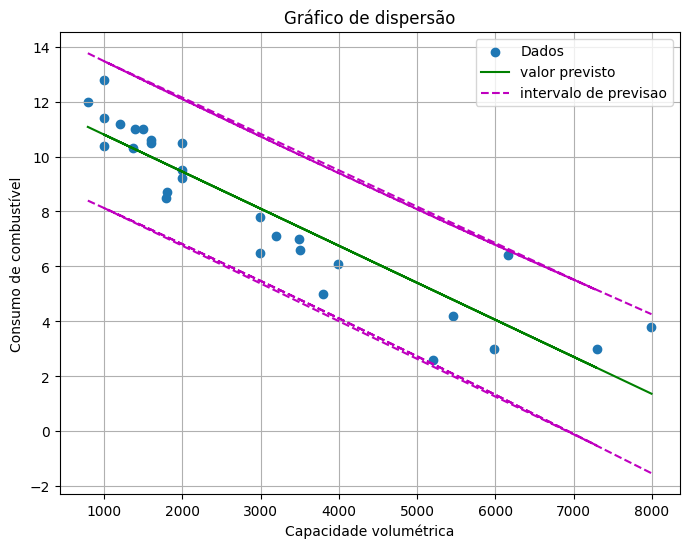

In [4]:
# visualizar correlação entre capacidade volumetrica e consumo
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['cap_vol'], df['consumo'], label='Dados')
plt.plot(df['cap_vol'], df['ŷ'], color='green', label='valor previsto')
plt.plot(df['cap_vol'], df['iv_l'], 'm--', label='intervalo de previsao')
plt.plot(df['cap_vol'], df['iv_u'], 'm--')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo de combustível')
plt.title('Gráfico de dispersão')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Análise de resíduos

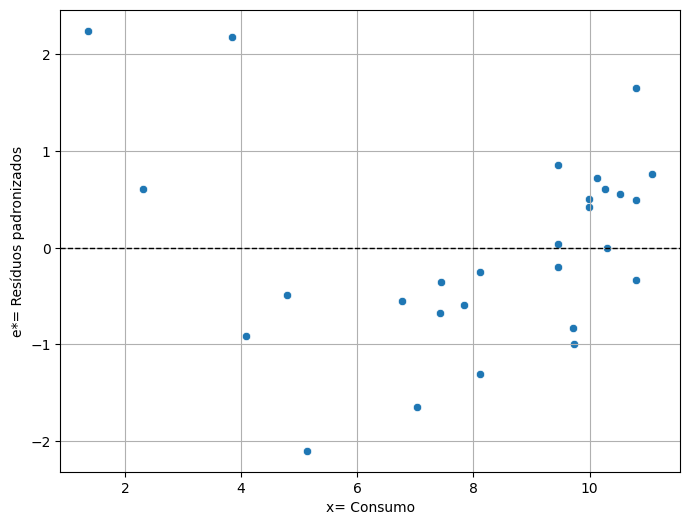

In [5]:
# variancia dos erros dos erros (deve estar entre 2 e -2)
residuo = modelo.resid

#crear instancia influence
influence = modelo.get_influence()

#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)

prop = np.divide(residuo, stdresid) #e/e* para verificar a proporcionalidade entre o erro e o erro padronizado

df_erros = pd.DataFrame({'y':df['consumo'], 
                         'ŷ':df['ŷ'], 
                         'e':residuo,
                         'e*':stdresid,
                         'e/e*':prop})

#@title Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='ŷ', y='e*', data=df_erros)
plt.xlabel('x= Consumo')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos padronizados')

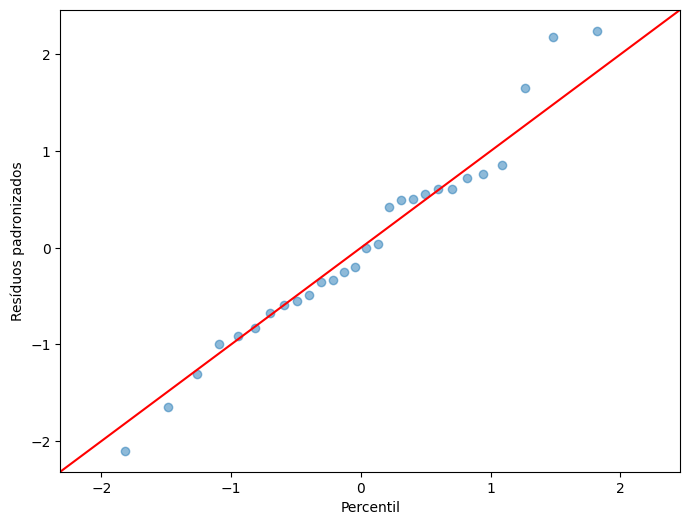

In [6]:
# qqplot para visualizar variancia dos erros
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

In [7]:
#teste de normalidade
#h0: os dados sao normais (pvalue > 0.5)
#h1: os dados nao sao normais (pvalue < 0.5)
res = stats.shapiro(df_erros['e'])
res

ShapiroResult(statistic=0.9768416881561279, pvalue=0.7692296504974365)

In [8]:
#teste de Homogeneidade de variancia Breusch-Pagan test
#h0: as variâncias dos erros sao iguais (homoscedasticidade)                         # modelo confiavel (durabilidade e consistencia estatistica) + (erro constante)
#h1: as variâncias dos erros nao sao iguais (heteroscedasticidade)                   # modelo nao confiavel

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

# verificar p-value
lzip(names, test_result)

[('Lagrange multiplier statistic', 7.189361228095695),
 ('p-value', 0.00733370832522016),
 ('f-value', 8.982107372064267),
 ('f p-value', 0.005928232361894992)]

## Exemplo 1.2 - Regressão linear simples (sklearn)

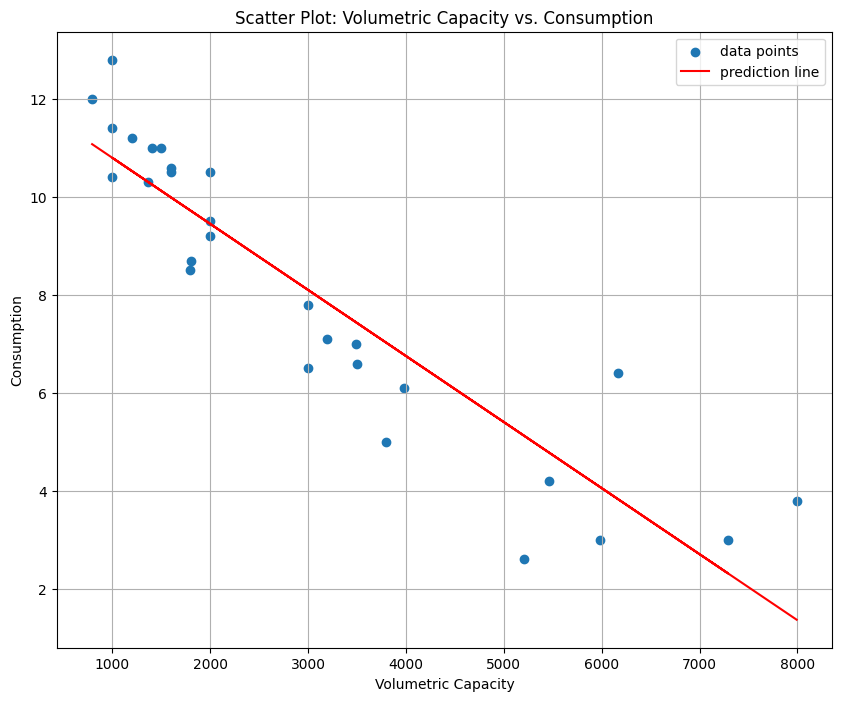

regressao linear simples com sklearn
MAE = 0.9792
MSE = 1.4638
RMSE = 1.2099
Linear coefficient: [12.14401012]
Angular coefficient: [[-0.00134785]]
Coefficient of determination: 0.8332512461736324


In [9]:
# Load dataset
df = pd.read_csv('dados/carst.csv', delimiter=',', encoding='utf-8')

# Select features and target
x = df[['cap_vol']]
#vtx = np.log(x)

y = df[['consumo']]
#vty = np.log(y)

# Train/Test split
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Train the model
linearized_model = LinearRegression().fit(x, y)

# Predict values
yhat = linearized_model.predict(x)

# Line parameters
linear_coefficient = linearized_model.intercept_
angular_coefficient = linearized_model.coef_

# Coefficient of determination
r2 = linearized_model.score(x, y)

# Error calculation
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

# Results visualization
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='data points')
plt.plot(x, yhat, color='red', label='prediction line')
plt.xlabel('Volumetric Capacity')
plt.ylabel('Consumption')
plt.title('Scatter Plot: Volumetric Capacity vs. Consumption')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('regressao linear simples com sklearn')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Linear coefficient: {linear_coefficient}')
print(f'Angular coefficient: {angular_coefficient}')
print(f'Coefficient of determination: {r2}')

In [10]:
# Análise de resíduos já executada no exemplo com statsmodels

## Exemplo 2.1 - Regressão linear simples linearizada (statsmodels)

In [27]:
x = [5, 10, 15, 20, 25, 30, 45, 60]
y = [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]

df = pd.DataFrame({'x':x, 'y':y})

# definir variavel resposta
y = df['y']

# definir variavel preditora
x = df['x']

correlacao = np.round(np.corrcoef(x, y)[0,1], 2)

# obter modelo linear atraves MMQ (OLS em ingles)
x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()

pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

rmse = rmse(df['y'], df['ŷ'])
mse = mse(df['y'], df['ŷ'])

df.head()

,x,y,iv_l,iv_u,ŷ
0,5,16.3,1.671452,19.806559,10.739005
1,10,9.7,0.825626,18.410500,9.618063
2,15,8.1,-0.087963,17.082204,8.497120
3,20,4.2,-1.074304,15.826660,7.376178
4,25,3.4,-2.136900,14.647371,6.255236


In [28]:
print(modelo.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     11.48
Date:                Wed, 10 Jan 2024   Prob (F-statistic):             0.0147
Time:                        16:06:02   Log-Likelihood:                -19.587
No. Observations:                   8   AIC:                             43.17
Df Residuals:                       6   BIC:                             43.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8599      2.079      5.705      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


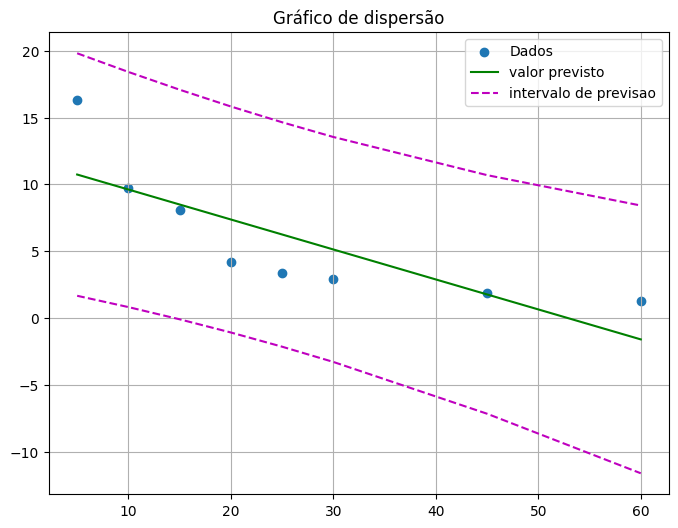

In [29]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['x'], df['y'], label='Dados')
plt.plot(df['x'], df['ŷ'], color='green', label='valor previsto')
plt.plot(df['x'], df['iv_l'], 'm--', label='intervalo de previsao')
plt.plot(df['x'], df['iv_u'], 'm--')
plt.title('Gráfico de dispersão')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [31]:
# aplicar log log para linearização dos dados e obtenção de melhores R2
x = [5, 10, 15, 20, 25, 30, 45, 60]
y = [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]

df = pd.DataFrame({'x':x, 'y':y})

# definir variavel resposta
df['vty'] = np.log(df['y'])
vty = df['vty']

# definir variavel preditora
df['vtx'] = np.log(df['x'])
vtx = df['vtx']

correlacao = np.round(np.corrcoef(vtx, vty)[0,1], 2)

# obter modelo linear atraves MMQ (OLS em ingles)
vtx = sm.add_constant(vtx)
modelo = sm.OLS(vty, vtx).fit()

pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

rmse = rmse(df['vty'], df['ŷ'])
mse = mse(df['vty'], df['ŷ'])

df.head()

,x,y,vty,vtx,iv_l,iv_u,ŷ
0,5,16.3,2.791165,1.609438,2.506996,3.392596,2.949796
1,10,9.7,2.272126,2.302585,1.828192,2.616902,2.222547
2,15,8.1,2.091864,2.708050,1.417564,2.176704,1.797134
3,20,4.2,1.435085,2.995732,1.119196,1.871400,1.495298
4,25,3.4,1.223775,3.218876,0.883602,1.638751,1.261176


In [32]:
print(modelo.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                    vty   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     239.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           4.63e-06
Time:                        16:06:58   Log-Likelihood:                 5.2525
No. Observations:                   8   AIC:                            -6.505
Df Residuals:                       6   BIC:                            -6.346
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6384      0.211     21.978      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


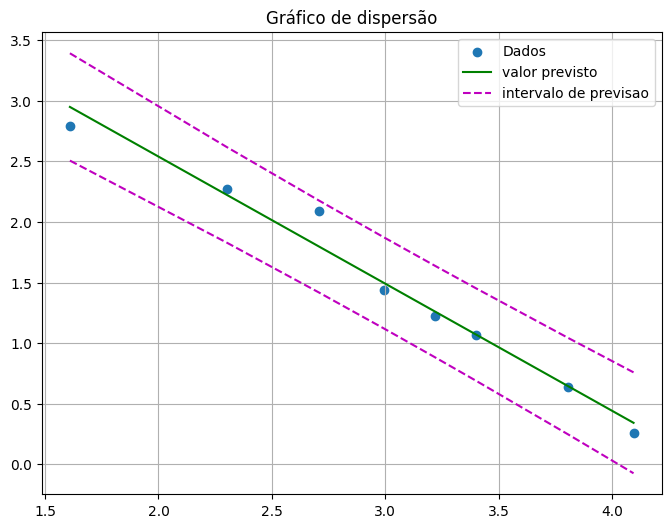

In [33]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['vtx'], df['vty'], label='Dados')
plt.plot(df['vtx'], df['ŷ'], color='green', label='valor previsto')
plt.plot(df['vtx'], df['iv_l'], 'm--', label='intervalo de previsao')
plt.plot(df['vtx'], df['iv_u'], 'm--')
plt.title('Gráfico de dispersão')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Análise de resíduos

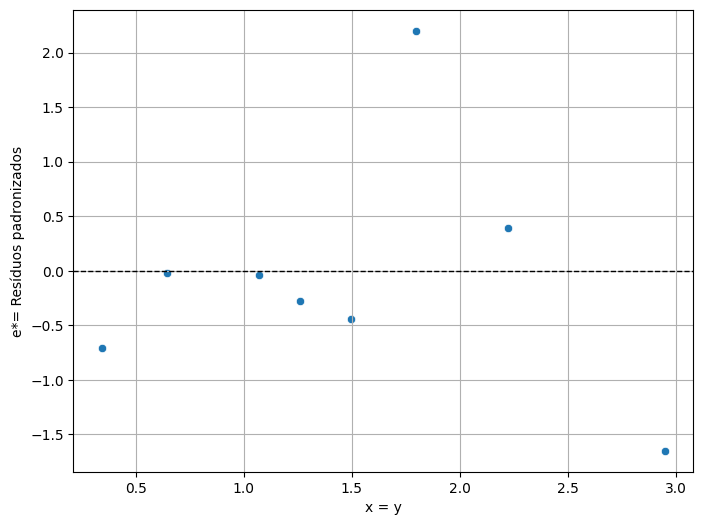

In [34]:
# variancia dos erros dos erros (deve estar entre 2 e -2)
residuo = modelo.resid

#crear instancia influence
influence = modelo.get_influence()

#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)

prop = np.divide(residuo, stdresid) #e/e* para verificar a proporcionalidade entre o erro e o erro padronizado

df_erros = pd.DataFrame({'y':df['y'], 
                         'ŷ':df['ŷ'], 
                         'e':residuo,
                         'e*':stdresid,
                         'e/e*':prop})

#@title Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='ŷ', y='e*', data=df_erros)
plt.xlabel('x = y')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos padronizados')

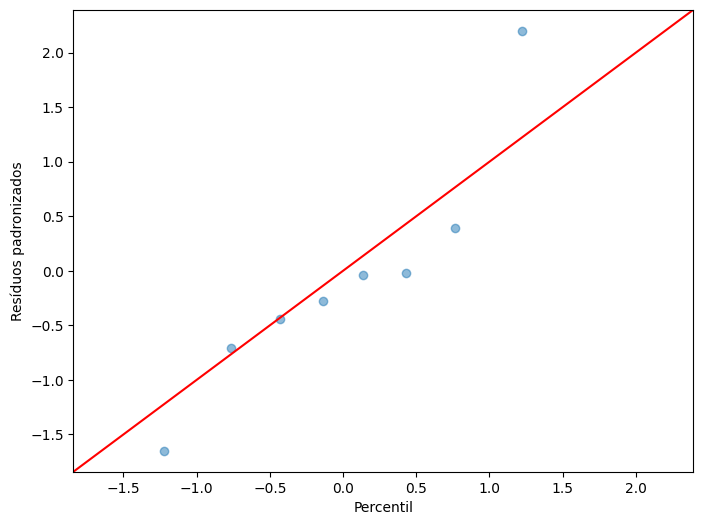

In [35]:
# qqplot para visualizar variancia dos erros
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

In [36]:
#teste de normalidade
#h0: os dados sao normais (pvalue > 0.5)
#h1: os dados nao sao normais (pvalue < 0.5)
res = stats.shapiro(df_erros['e'])
res

ShapiroResult(statistic=0.8502150177955627, pvalue=0.095748171210289)

In [37]:
#teste de Homogeneidade de variancia Breusch-Pagan test
#h0: as variâncias dos erros sao iguais (homoscedasticidade)                         # modelo confiavel (durabilidade e consistencia estatistica) + (erro constante)
#h1: as variâncias dos erros nao sao iguais (heteroscedasticidade)                   # modelo nao confiavel

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

# verificar p-value
lzip(names, test_result)

[('Lagrange multiplier statistic', 0.9065455396750277),
 ('p-value', 0.3410326531438569),
 ('f-value', 0.7668017421515915),
 ('f p-value', 0.41488466657358297)]

## Exemplo 2.2 - Regressão linear simples linearizada (sklearn)

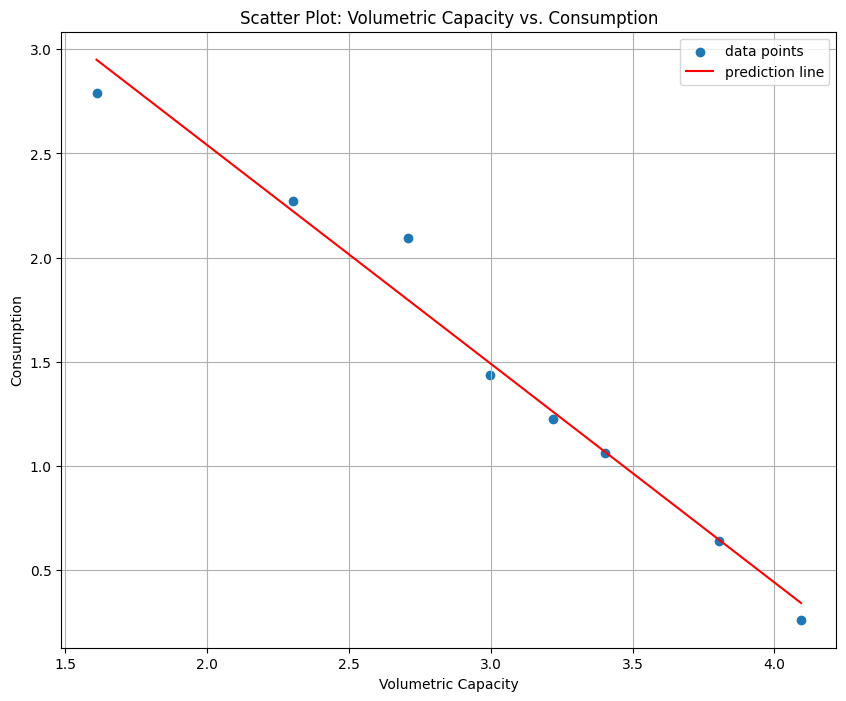

regressao linear simples lionearizada Sklearn
MAE = 0.0861
MSE = 0.0157
RMSE = 0.1255
Linear coefficient: [4.63841488]
Angular coefficient: [[-1.04919812]]
Coefficient of determination: 0.9755162872695168


In [39]:
x = [5, 10, 15, 20, 25, 30, 45, 60]
y = [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]

df = pd.DataFrame({'x':x, 'y':y})

# Select features and target
x = df[['x']]
vtx = np.log(x)

y = df[['y']]
vty = np.log(y)

# Train/Test split
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Train the model
linearized_model = LinearRegression().fit(vtx, vty)

# Predict values
yhat = linearized_model.predict(vtx)

# Line parameters
linear_coefficient = linearized_model.intercept_
angular_coefficient = linearized_model.coef_

# Coefficient of determination
r2 = linearized_model.score(vtx, vty)

# Error calculation
MAE = mean_absolute_error(vty, yhat)
MSE = mean_squared_error(vty, yhat)
RMSE = np.sqrt(MSE)

# Results visualization
plt.figure(figsize=(10, 8))
plt.scatter(vtx, vty, label='data points')
plt.plot(vtx, yhat, color='red', label='prediction line')
plt.xlabel('Volumetric Capacity')
plt.ylabel('Consumption')
plt.title('Scatter Plot: Volumetric Capacity vs. Consumption')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('regressao linear simples lionearizada Sklearn')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Linear coefficient: {linear_coefficient}')
print(f'Angular coefficient: {angular_coefficient}')
print(f'Coefficient of determination: {r2}')

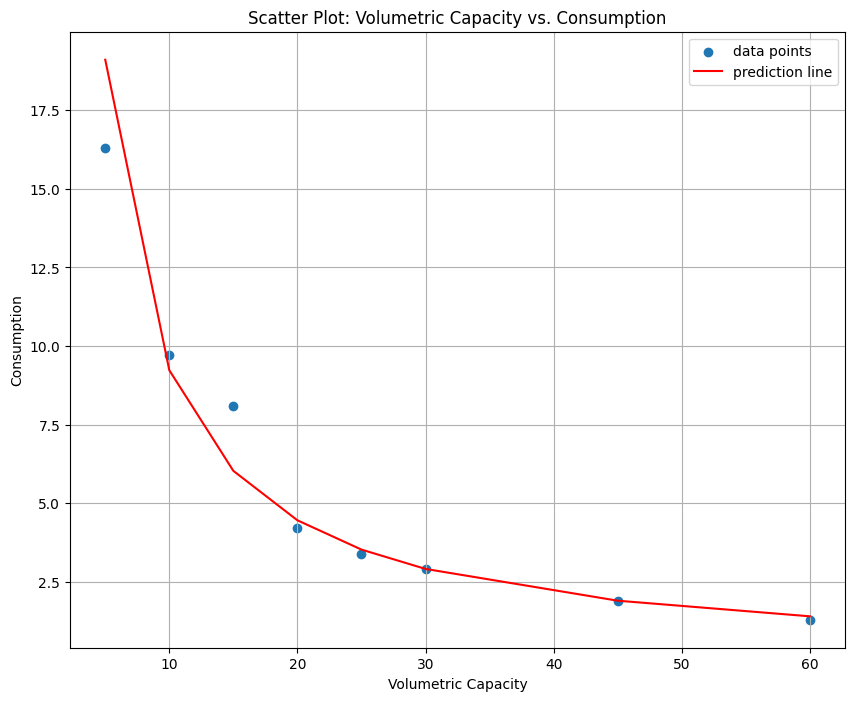

regressao linear simples lionearizada Sklearn
MAE = 0.7322
MSE = 1.5555
RMSE = 1.2472
Linear coefficient: [4.63841488]
Angular coefficient: [[-1.04919812]]
Coefficient of determination: -44.75525269241642


In [40]:
# Visualizar na forma original
# Coefficient of determination
r2 = linearized_model.score(np.exp(vtx), np.exp(vty))

# Error calculation
MAE = mean_absolute_error(np.exp(vty), np.exp(yhat))
MSE = mean_squared_error(np.exp(vty), np.exp(yhat))
RMSE = np.sqrt(MSE)

# Results visualization
plt.figure(figsize=(10, 8))
plt.scatter(np.exp(vtx), np.exp(vty), label='data points')
plt.plot(np.exp(vtx), np.exp(yhat), color='red', label='prediction line')
plt.xlabel('Volumetric Capacity')
plt.ylabel('Consumption')
plt.title('Scatter Plot: Volumetric Capacity vs. Consumption')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('regressao linear simples lionearizada Sklearn')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Linear coefficient: {linear_coefficient}')
print(f'Angular coefficient: {angular_coefficient}')
print(f'Coefficient of determination: {r2}')

## Exemplo 3.1 - Regressão polinomial (statsmodels)

In [42]:
x = [7, 10.3, 13.7, 16.6, 19.8, 22]
y = [479, 503, 487, 470, 458, 412]

df = pd.DataFrame({'x':x, 'y':y})

# definir variavel resposta
y = df['y']

# definir variavel preditora
x = df['x']

correlacao = np.round(np.corrcoef(x, y)[0,1], 2)

# obter modelo linear atraves OLS
x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()

pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

rmse = rmse(df['y'], df['ŷ'])
mse = mse(df['y'], df['ŷ'])

df.head()

,x,y,iv_l,iv_u,ŷ
0,7.0,479,429.414780,576.408573,502.911677
1,10.3,503,421.190716,555.605161,488.397938
2,13.7,487,409.462086,537.426693,473.444390
3,16.6,470,396.464946,524.914838,460.689892
4,19.8,458,378.955377,514.276551,446.615964


In [43]:
print(modelo.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6.950
Date:                Wed, 10 Jan 2024   Prob (F-statistic):             0.0578
Time:                        16:12:27   Log-Likelihood:                -25.637
No. Observations:                   6   AIC:                             55.27
Df Residuals:                       4   BIC:                             54.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.6984     26.328     20.271      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


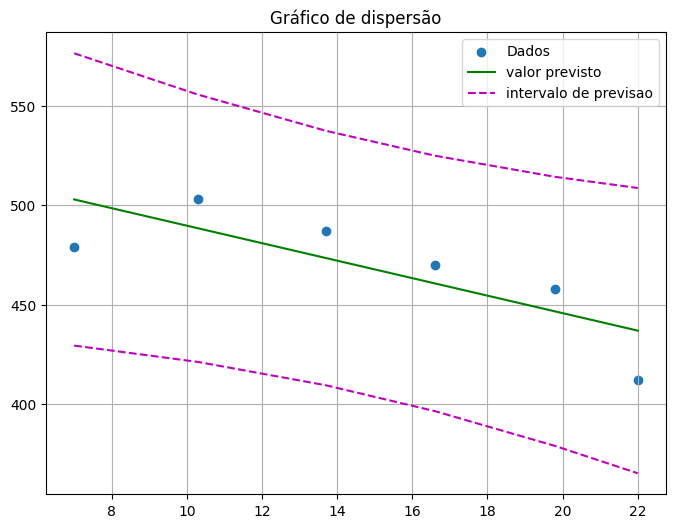

In [44]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['x'], df['y'], label='Dados')
plt.plot(df['x'], df['ŷ'], color='green', label='valor previsto')
plt.plot(df['x'], df['iv_l'], 'm--', label='intervalo de previsao')
plt.plot(df['x'], df['iv_u'], 'm--')
plt.title('Gráfico de dispersão')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [49]:
# modelo polinomial de grau 2
x = [7, 10.3, 13.7, 16.6, 19.8, 22]
y = [479, 503, 487, 470, 458, 412]

df = pd.DataFrame({'x':x, 'y':y})

# definir variavel resposta
y = df['y']

# definir variavel preditora
x = df['x']

x = sm.add_constant(x)  

#definir o valor de k, isto é o grau do polinômio
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)

# selecionar colunas nao repetidas
xp = xp[:, 3:]

# criar modelo com os dados transformados
modelo = sm.OLS(y, xp).fit()

pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

rmse = rmse(df['y'], df['ŷ'])
mse = mse(df['y'], df['ŷ'])

df.head()

,x,y,iv_l,iv_u,ŷ
0,7.0,479,437.846284,525.707359,481.776822
1,10.3,503,457.619215,531.970173,494.794694
2,13.7,487,453.781673,530.453796,492.117734
3,16.6,470,439.250226,514.610784,476.930505
4,19.8,458,409.346625,483.424133,446.385379


In [50]:
print(modelo.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     22.51
Date:                Wed, 10 Jan 2024   Prob (F-statistic):             0.0156
Time:                        16:41:46   Log-Likelihood:                -20.339
No. Observations:                   6   AIC:                             46.68
Df Residuals:                       3   BIC:                             46.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        403.2396     36.453     11.062      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


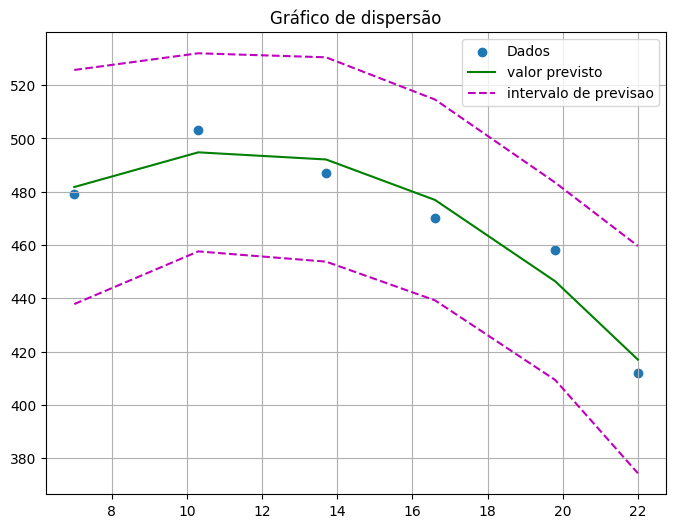

In [51]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['x'], df['y'], label='Dados')
plt.plot(df['x'], df['ŷ'], color='green', label='valor previsto')
plt.plot(df['x'], df['iv_l'], 'm--', label='intervalo de previsao')
plt.plot(df['x'], df['iv_u'], 'm--')
plt.title('Gráfico de dispersão')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Análise de resíduos

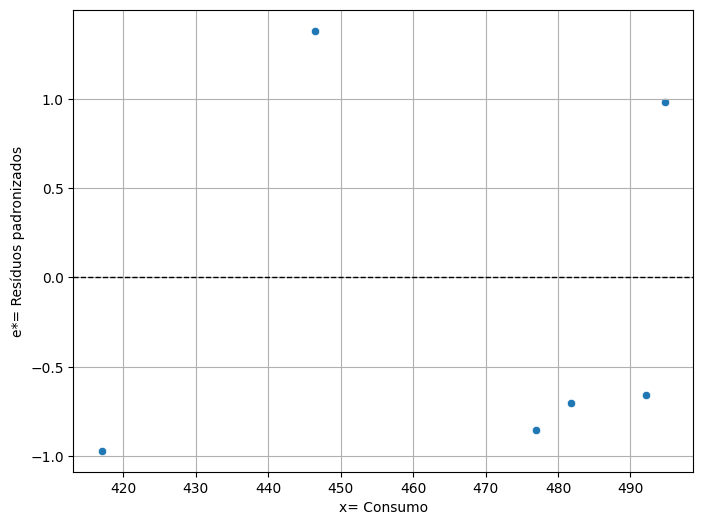

In [53]:
# variancia dos erros dos erros (deve estar entre 2 e -2)
residuo = modelo.resid

#crear instancia influence
influence = modelo.get_influence()

#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)

prop = np.divide(residuo, stdresid) #e/e* para verificar a proporcionalidade entre o erro e o erro padronizado

df_erros = pd.DataFrame({'y':df['y'], 
                         'ŷ':df['ŷ'], 
                         'e':residuo,
                         'e*':stdresid,
                         'e/e*':prop})

#@title Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='ŷ', y='e*', data=df_erros)
plt.xlabel('x= Consumo')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos padronizados')

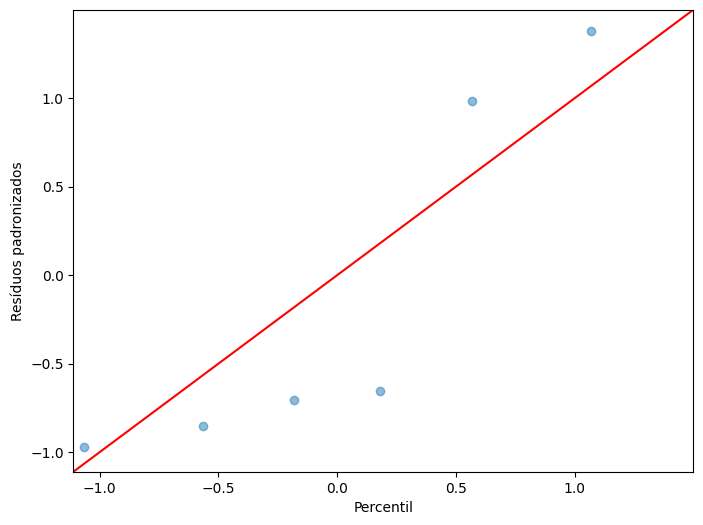

In [54]:
# qqplot para visualizar variancia dos erros
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

In [55]:
#teste de normalidade
#h0: os dados sao normais (pvalue > 0.5)
#h1: os dados nao sao normais (pvalue < 0.5)
res = stats.shapiro(df_erros['e'])
res

ShapiroResult(statistic=0.8137236833572388, pvalue=0.07781578600406647)

In [56]:
#teste de Homogeneidade de variancia Breusch-Pagan test
#h0: as variâncias dos erros sao iguais (homoscedasticidade)                         # modelo confiavel (durabilidade e consistencia estatistica) + (erro constante)
#h1: as variâncias dos erros nao sao iguais (heteroscedasticidade)                   # modelo nao confiavel

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

# verificar p-value
lzip(names, test_result)

[('Lagrange multiplier statistic', 1.3338179136073245),
 ('p-value', 0.5132927381972192),
 ('f-value', 0.42877170958360644),
 ('f p-value', 0.6858286879564596)]

## Exemplo 3.2 - Regressão polinomial (sklearn)

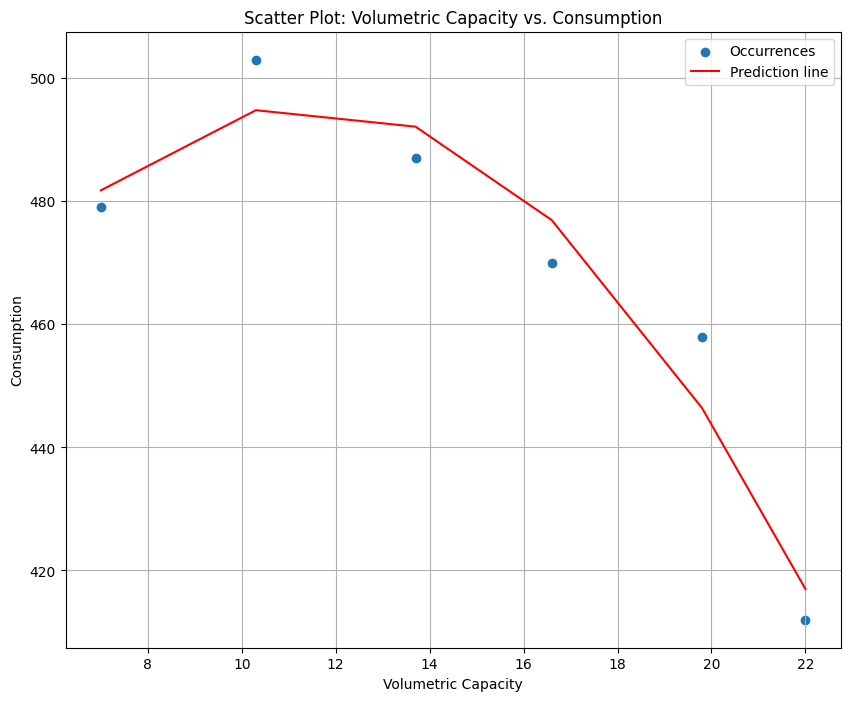

Sklearn Polynomial Regression
MAE = 6.6066
MSE = 51.5182
RMSE = 7.1776
Intercept Coefficient: [403.23955811]
Slope Coefficients: [[ 0.         16.16364738 -0.70629119]]
Coefficient of Determination: 0.937513765115124


In [76]:
x = [7, 10.3, 13.7, 16.6, 19.8, 22]
y = [479, 503, 487, 470, 458, 412]

df = pd.DataFrame({'x':x, 'y':y})

# Select features
x = df[['x']].values

# Select target
y = df[['y']].values

# Train/test split
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Obtain polynomial
polynomial_features = PolynomialFeatures(degree=2)
xpol = polynomial_features.fit_transform(x)

# Train model
polynomial_model = LinearRegression().fit(xpol, y)

# Predict values
yhat = polynomial_model.predict(xpol)

# Parameters
intercept_coefficient = polynomial_model.intercept_
slope_coefficient = polynomial_model.coef_

# Coefficient of determination
r2 = polynomial_model.score(xpol, y)

# Errors
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

# Data visualization
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='Occurrences')
plt.plot(x, yhat, color='red', label='Prediction line')
plt.xlabel('Volumetric Capacity')
plt.ylabel('Consumption')
plt.title('Scatter Plot: Volumetric Capacity vs. Consumption')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('Sklearn Polynomial Regression')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Intercept Coefficient: {intercept_coefficient}')
print(f'Slope Coefficients: {slope_coefficient}')
print(f'Coefficient of Determination: {r2}')

In [ ]:
# Analise de resíduos em statsmodels

## Exemplo 4.1 - Regressão linear múltipla (statsmodels)

In [57]:
x1 = [2.04, 2.04, 3.06, 3.06, 4.08, 4.08, 2.06, 2.06, 3.08, 3.08, 4.11, 4.11, 2.01, 3.02, 4.03]
x2 = [3.55, 6.07, 3.55, 6.07, 3.55, 6.16, 3.62, 6.16, 3.62, 5.89, 3.62, 5.89, 6.18, 6.18, 6.18]
x3 = np.multiply(x1, x2)

y = [3.11, 3.26, 3.89, 10.25, 3.11, 13.48, 3.94, 3.53, 3.36, 6.49, 2.72, 12.48, 2.82, 5.19, 8.04]

df = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3, 'y':y})

modelo = smf.ols('y ~x1 + x2 + x3', data=df).fit()

pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

rmse = rmse(df['y'], df['ŷ'])
mse = mse(df['y'], df['ŷ'])

df.head()

,x1,x2,x3,y,iv_l,iv_u,ŷ
0,2.04,3.55,7.2420,3.11,-0.875057,8.197467,3.661205
1,2.04,6.07,12.3828,3.26,-1.047165,7.479038,3.215936
2,3.06,3.55,10.8630,3.89,-0.755585,7.447919,3.346167
3,3.06,6.07,18.5742,10.25,3.295080,11.280682,7.287881
4,4.08,3.55,14.4840,3.11,-1.485646,7.547904,3.031129


In [58]:
print(modelo.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     17.31
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           0.000178
Time:                        16:44:25   Log-Likelihood:                -27.112
No. Observations:                  15   AIC:                             62.22
Df Residuals:                      11   BIC:                             65.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2787      7.167      2.411      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Análise de resíduos

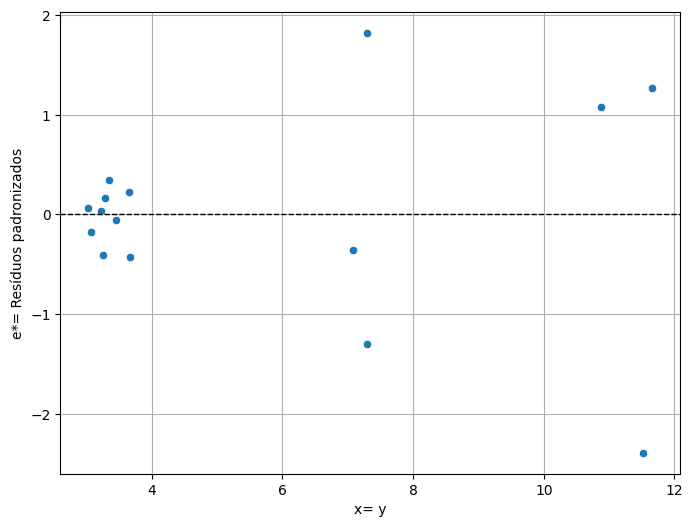

In [60]:
# variancia dos erros dos erros (deve estar entre 2 e -2)
residuo = modelo.resid

#crear instancia influence
influence = modelo.get_influence()

#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)

prop = np.divide(residuo, stdresid) #e/e* para verificar a proporcionalidade entre o erro e o erro padronizado

df_erros = pd.DataFrame({'y':df['y'], 
                         'ŷ':df['ŷ'], 
                         'e':residuo,
                         'e*':stdresid,
                         'e/e*':prop})

#@title Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='ŷ', y='e*', data=df_erros)
plt.xlabel('x= y')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos padronizados')

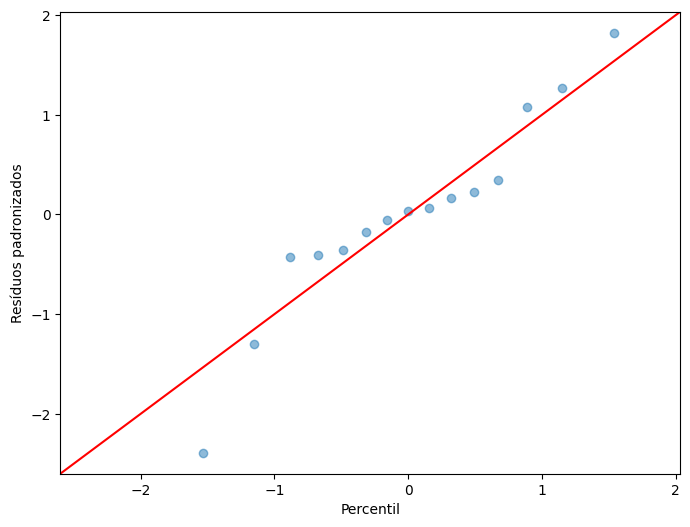

In [61]:
# qqplot para visualizar variancia dos erros
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

In [62]:
#teste de normalidade
#h0: os dados sao normais (pvalue > 0.5)
#h1: os dados nao sao normais (pvalue < 0.5)
res = stats.shapiro(df_erros['e'])
res

ShapiroResult(statistic=0.9371870756149292, pvalue=0.3483145236968994)

In [63]:
#teste de Homogeneidade de variancia Breusch-Pagan test
#h0: as variâncias dos erros sao iguais (homoscedasticidade)                         # modelo confiavel (durabilidade e consistencia estatistica) + (erro constante)
#h1: as variâncias dos erros nao sao iguais (heteroscedasticidade)                   # modelo nao confiavel

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

# verificar p-value
lzip(names, test_result)

[('Lagrange multiplier statistic', 7.729134070141237),
 ('p-value', 0.0519542841237781),
 ('f-value', 3.897769334571549),
 ('f p-value', 0.040323429283969564)]

## Exemplo 4.2 - Regressão linear múltipla (sklearn)

In [78]:
x1 = [2.04, 2.04, 3.06, 3.06, 4.08, 4.08, 2.06, 2.06, 3.08, 3.08, 4.11, 4.11, 2.01, 3.02, 4.03]
x2 = [3.55, 6.07, 3.55, 6.07, 3.55, 6.16, 3.62, 6.16, 3.62, 5.89, 3.62, 5.89, 6.18, 6.18, 6.18]
x3 = np.multiply(x1, x2)

y = [3.11, 3.26, 3.89, 10.25, 3.11, 13.48, 3.94, 3.53, 3.36, 6.49, 2.72, 12.48, 2.82, 5.19, 8.04]

df = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3, 'y':y})

# Select features and target
x = df[['x1', 'x2', 'x3']]
y = df[['y']]

# Split train/test
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Train model
linear_model = LinearRegression().fit(x, y)

# Predict values
yhat = linear_model.predict(x)

# Line parameters
intercept_coefficient = linear_model.intercept_
slope_coefficients = linear_model.coef_

# Coefficient of determination
r2 = linear_model.score(x, y)

# Error calculation
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

print('Sklearn Multiple Regression')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Intercept Coefficient: {intercept_coefficient}')
print(f'Slope Coefficients: {slope_coefficients}')
print(f'Coefficient of Determination: {r2}')

Sklearn Multiple Regression
MAE = 1.0131
MSE = 2.1752
RMSE = 1.4748
Intercept Coefficient: [17.27869389]
Slope Coefficients: [[-6.36775762 -3.65842623  1.70673153]]
Coefficient of Determination: 0.8252037753778994


In [64]:
# Análise de resíduos em statsmodels

## Exemplo 5. - Integração com ASN e demonstração do processo completo para obtenção do modelo

In [90]:
estudante = [2, 6, 8, 8, 12,16 ,20 ,20 ,22, 26]
pizza = [55, 105, 88, 118, 117, 137, 157, 169, 149, 202]

df = pd.DataFrame({'estudante':estudante, 'pizza':pizza})

x = sm.add_constant(df['estudante'])
modelo = sm.OLS(df['pizza'], x).fit()

pred_ols = modelo.get_prediction()
df['ŷ'] = pred_ols.summary_frame()['mean']


print(modelo.summary())

print(rmse(df['pizza'], df['ŷ']))
print(mse(df['pizza'], df['ŷ']))

                            OLS Regression Results                            
Dep. Variable:                  pizza   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     72.46
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.79e-05
Time:                        14:19:21   Log-Likelihood:                -39.590
No. Observations:                  10   AIC:                             83.18
Df Residuals:                       8   BIC:                             83.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8127      9.458      6.218      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


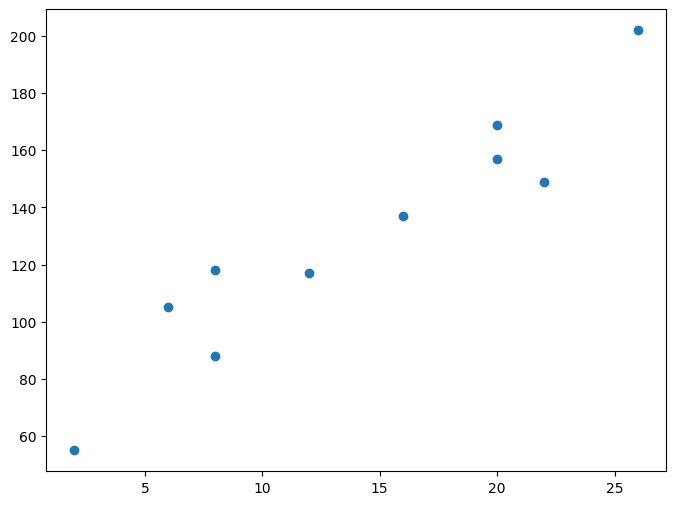

In [81]:
plt.scatter(df['estudante'], df['pizza'])
plt.show()

In [112]:
df = pd.read_csv('/home/ninek/DS/tools/supervised_models/linear_regression/dados/Bodyfat.csv', sep=',', encoding='utf-8')

modelo = smf.ols('bodyfat ~ Age + Weight + Neck + Abdomen + Hip + Thigh + Forearm + Wrist', data=df).fit()

pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

print(modelo.summary())

print(rmse(df['bodyfat'], df['ŷ']))

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     89.47
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           4.92e-68
Time:                        14:41:41   Log-Likelihood:                -719.50
No. Observations:                 252   AIC:                             1457.
Df Residuals:                     243   BIC:                             1489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.6564     11.714     -1.934      0.0

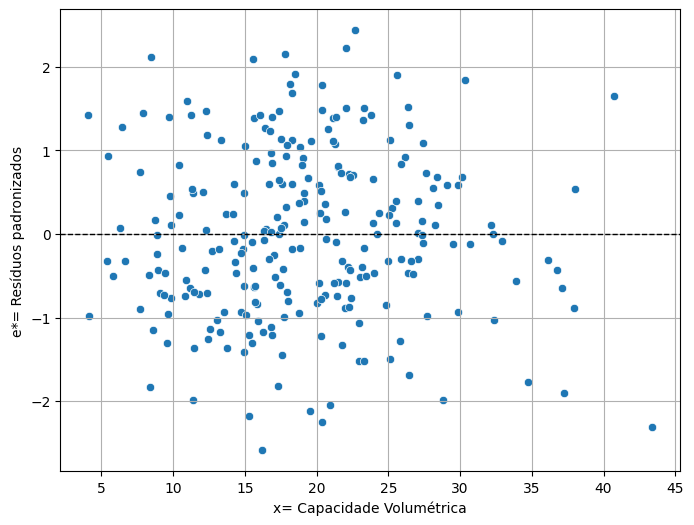

In [131]:
# variancia dos erros dos erros
residuo = modelo.resid

#crear instancia influence
influence = modelo.get_influence()

#obter residuos standardizados
stdresid = list(influence.resid_studentized_internal)

prop = np.divide(residuo, stdresid) #e/e* para verificar a proporcionalidade entre o erro e o erro padronizado

df_erros = pd.DataFrame({'y':df['bodyfat'], 
                         'ŷ':df['ŷ'], 
                         'e':residuo,
                         'e*':stdresid,
                         'e/e*':prop})

#@title Gráficos de diagnóstico 3 (resíduos padronizados vs. x)
sns.scatterplot(x='ŷ', y='e*', data=df_erros)
plt.xlabel('x= Capacidade Volumétrica')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos padronizados')

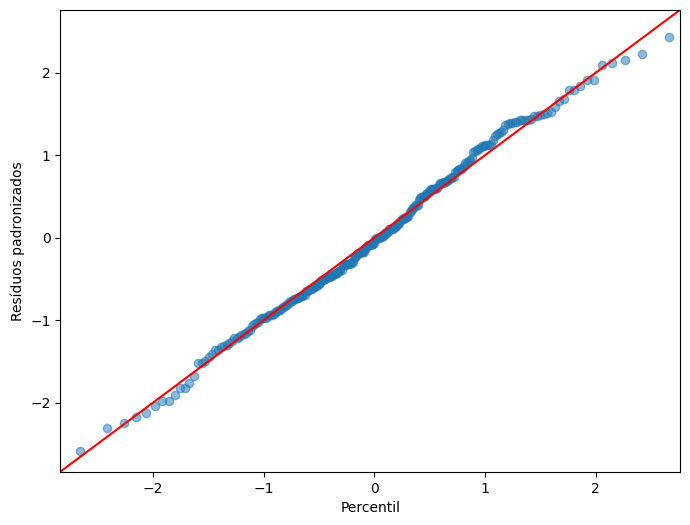

In [132]:
# qqplot para visualizar variancia dos erros
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

In [138]:
from scipy import stats

#teste de normalidade
#h0: os dados sao normais
#h1: os dados nao sao normais
res = stats.shapiro(df_erros['e'])
res

ShapiroResult(statistic=0.9930620789527893, pvalue=0.29079365730285645)

In [142]:
from statsmodels.compat import lzip

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
 
lzip(names, test_result)



[('Lagrange multiplier statistic', 11.11152809827417),
 ('p-value', 0.1954595960944528),
 ('f-value', 1.4011158911862394),
 ('f p-value', 0.1965178189526762)]

## Exemplo 3 de ASN (multicolinearidade)

In [80]:
df = pd.read_excel("/home/ninek/DS/tools/supervised_models/linear_regression/dados/Galoes.xlsx")

modelo = smf.ols('Tempo_viagem ~ Galoes_gastos + Milhas_percorridas', data=df).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           Tempo_viagem   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     8.537
Date:                Wed, 10 Jan 2024   Prob (F-statistic):             0.0133
Time:                        17:10:23   Log-Likelihood:                -12.370
No. Observations:                  10   AIC:                             30.74
Df Residuals:                       7   BIC:                             31.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.6590      1

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                    Tempo_viagem  Milhas_percorridas  Galoes_gastos
Tempo_viagem            1.000000            0.814906       0.752834
Milhas_percorridas      0.814906            1.000000       0.978103
Galoes_gastos           0.752834            0.978103       1.000000


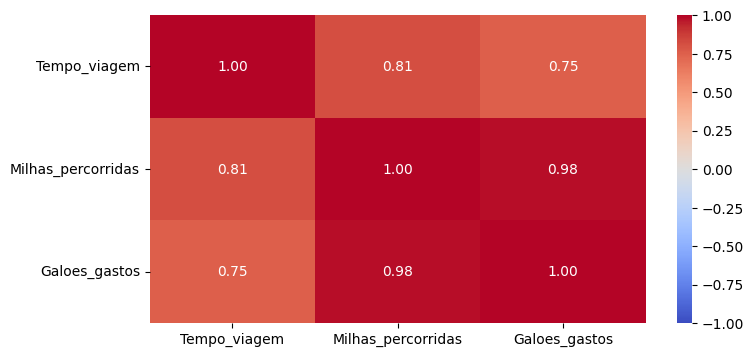

In [81]:
# Calcula a correlação entre os atributos numéricos
corr = df.corr()
print(corr)

# Resultado
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF_values'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
  
features = df[['Milhas_percorridas', 'Galoes_gastos']]
calculate_vif(features)

,features,VIF_values
0,Milhas_percorridas,450.014302
1,Galoes_gastos,450.014302


In [83]:
# *************** talvez criar exemplo para variavel dummie **************